Weights = [0.383 4.652 1.017 2.622]
Bias = 16.027


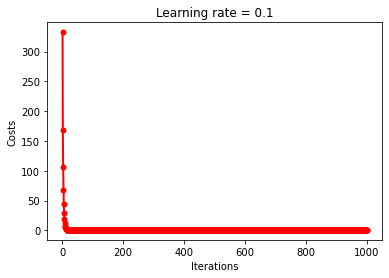

Trainset RMSE = 0.879
Testset RMSE = 0.655


In [1]:
# Textbook: Principles and Practices of Machine Learning
# Lab 2-5: linear regression, batch, feature scaling
# Author: Zhe Chen (ml_iot@163.com), 2021

import pandas
import numpy as np
import matplotlib.pyplot as plt

# parameters
iterations = 1000 # number of iterations for training
learning_rate = 0.1 # learning rate
m_train = 3000 # number of samples for training
flag_fs = 'std' # feature scaling: 'std', 'norm_minmax', 'norm_mean', or 'none'

# load dataset
df = pandas.read_csv('temperature_dataset.csv')
data = np.array(df)
m_all = np.shape(data)[0] # number of samples 
d = np.shape(data)[1] - 1 # dimension of input features
m_test = m_all - m_train # number of samples for testing

# feature scaling
if flag_fs == 'std': # standardization
    mean = np.mean(data[0:m_train, 1:], axis=0)
    std = np.std(data[0:m_train, 1:], axis=0, ddof=1)
    data[:, 1:] = (data[:, 1:] - mean) / std
elif flag_fs == 'norm_minmax': # min-max normalization
    xmin = np.amin(data[0:m_train, 1:], axis=0)
    xmax = np.amax(data[0:m_train, 1:], axis=0)
    data[:, 1:] = (data[:, 1:] - xmin) / (xmax - xmin)
elif flag_fs == 'norm_mean': # mean normalization
    xmin = np.amin(data[0:m_train, 1:], axis=0)
    xmax = np.amax(data[0:m_train, 1:], axis=0)
    mean = np.mean(data[0:m_train, 1:], axis=0)
    data[:, 1:] = (data[:, 1:] - mean) / (xmax - xmin)

# split dataset
X_train = data[0:m_train, 1:].T # d by m_train
X_test = data[m_train:, 1:].T # d by m_test
y_train = data[0:m_train, 0].reshape((1, -1)) # 1 by m_train
y_test = data[m_train:, 0].reshape((1, -1)) # 1 by m_test

# initialization
w = np.zeros((d, 1)).reshape((-1, 1)) # weights, d by 1
b = 0 # bias, scalar
v = np.ones((1, m_train)) # constant ones, 1 by m_train
costs_saved = [] # for saving costs

# loop for iterations
for i in range(iterations):
    
    # update w,b
    y_hat = np.dot(w.T, X_train) + b * v
    e = y_hat - y_train
    b = b - 2. * learning_rate * np.dot(v, e.T) / m_train
    w = w - 2. * learning_rate * np.dot(X_train, e.T) / m_train
    
    # save costs
    costs = np.dot(e, e.T) / m_train
    costs_saved.append(costs.item(0))
    
# print final weights
print('Weights =', np.array2string(np.squeeze(w, axis=1), precision=3))
print(f'Bias = {b.item(0):.3f}')

# plot costs
plt.plot(range(1, np.size(costs_saved) + 1), costs_saved, 'r-o', linewidth=2, markersize=5)
plt.ylabel('Costs')
plt.xlabel('Iterations')
plt.title('Learning rate = ' + str(learning_rate))
plt.show()

# trainset RMSE
y_hat = np.dot(w.T, X_train) + b * v
e = y_hat - y_train
mse = np.dot(e, e.T) / m_train
rmse = np.sqrt(mse)
print(f'Trainset RMSE = {rmse.item(0):.3f}')

# testset RMSE
y_hat_test = np.dot(w.T, X_test) + b # broadcasting here
e_test = y_hat_test - y_test
mse_test = np.dot(e_test, e_test.T) / m_test
rmse_test = np.sqrt(mse_test)
print(f'Testset RMSE = {rmse_test.item(0):.3f}')
